In [2]:
import pandas as pd

# Load the dataset (assuming a CSV file for example)
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

# Inspect the first few rows of the dataframe
df.head()

# Get the shape of the dataset
df_shape = df.shape
print(f"Shape of dataset: {df_shape}")

# Check for null values
null_values = df.isnull().sum()
print(f"Null values in each column:\n{null_values}")



Shape of dataset: (364558, 53)
Null values in each column:
Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      240

In [4]:
# Check the unique types of values in columns 48 and 49
print(df.iloc[:, 48].apply(type).value_counts())
print(df.iloc[:, 49].apply(type).value_counts())

Ferry Direction
<class 'float'>    364557
<class 'str'>           1
Name: count, dtype: int64
Ferry Terminal Name
<class 'float'>    364556
<class 'str'>           2
Name: count, dtype: int64


In [23]:
# Convert the problematic columns to strings (if needed)
df.iloc[:, 48] = df.iloc[:, 48].astype(str)
df.iloc[:, 49] = df.iloc[:, 49].astype(str)


In [25]:
# Drop rows with null values in important columns (if any)
df_cleaned = df.dropna(subset=['Complaint Type', 'City', 'Created Date'])

# Or alternatively, fill missing values in certain columns with a placeholder or mean/mode if appropriate
# df['Complaint Type'].fillna('Unknown', inplace=True)


In [27]:
# Convert 'Created Date' to datetime format
df_cleaned['Created Date'] = pd.to_datetime(df_cleaned['Created Date'], errors='coerce')

# Remove entries with incorrect dates (e.g., out-of-range)
df_cleaned = df_cleaned[df_cleaned['Created Date'].notnull()]


C:\Users\Anshuman\AppData\Local\Temp\ipykernel_6456\2247741607.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Created Date'] = pd.to_datetime(df_cleaned['Created Date'], errors='coerce')
C:\Users\Anshuman\AppData\Local\Temp\ipykernel_6456\2247741607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Created Date'] = pd.to_datetime(df_cleaned['Created Date'], errors='coerce')


In [29]:
# Display unique samples from the 'Created Date' column
print(df_cleaned['Created Date'].head(10))


0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
5   2015-12-31 23:56:30
6   2015-12-31 23:55:32
7   2015-12-31 23:54:05
8   2015-12-31 23:53:58
9   2015-12-31 23:53:58
Name: Created Date, dtype: datetime64[ns]


In [31]:
df_cleaned['Created Date'] = pd.to_datetime(df_cleaned['Created Date'], format='%Y-%m-%d', errors='coerce')


In [35]:
# If df_cleaned is a slice of another DataFrame, create a copy first
df_cleaned = df_cleaned.copy()

# Convert 'Created Date' to datetime format
df_cleaned.loc[:, 'Created Date'] = pd.to_datetime(df_cleaned['Created Date'], errors='coerce')

# Remove rows with invalid (NaT) dates
df_cleaned = df_cleaned[df_cleaned['Created Date'].notnull()]



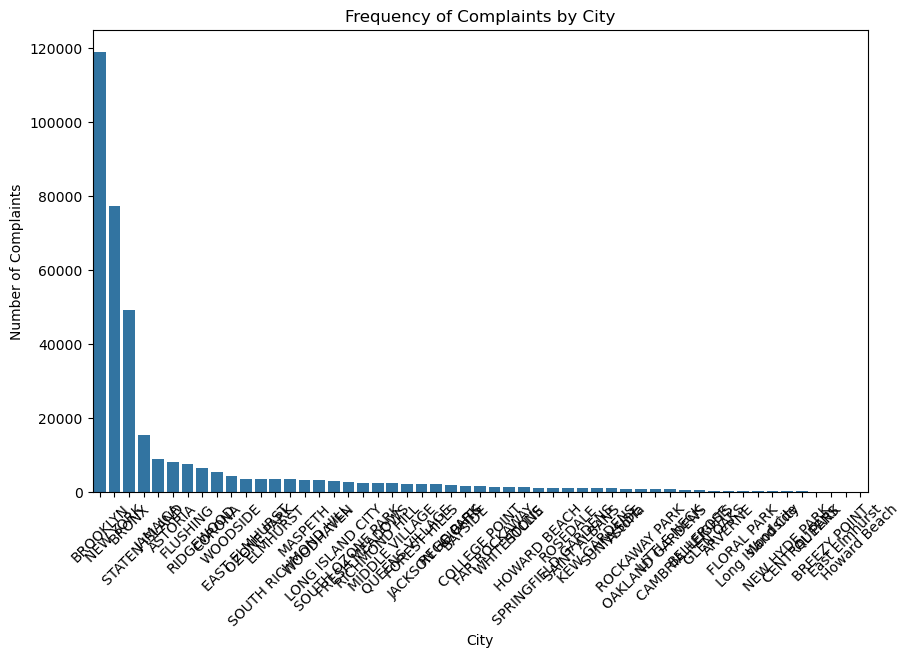

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count complaints by city
city_complaints = df_cleaned['City'].value_counts()

# Plot frequency of complaints by city
plt.figure(figsize=(10,6))
sns.barplot(x=city_complaints.index, y=city_complaints.values)
plt.title("Frequency of Complaints by City")
plt.xlabel("City")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()


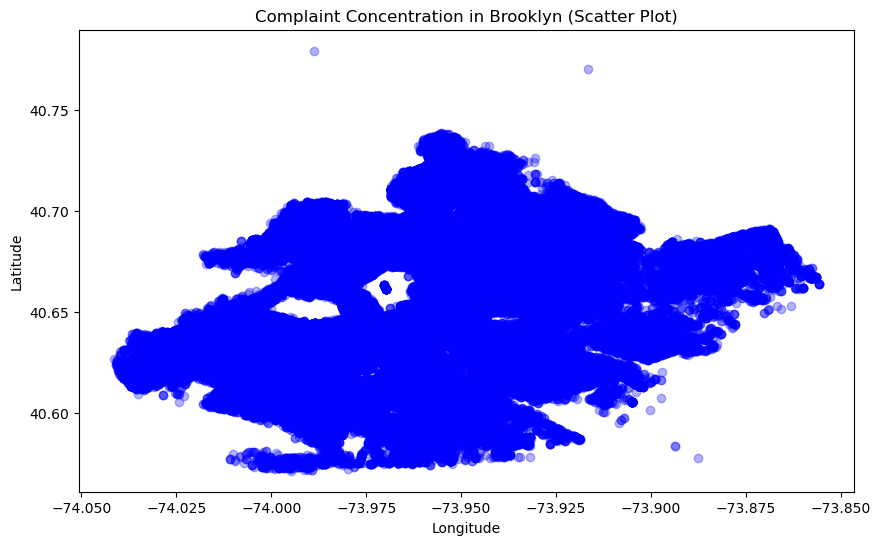

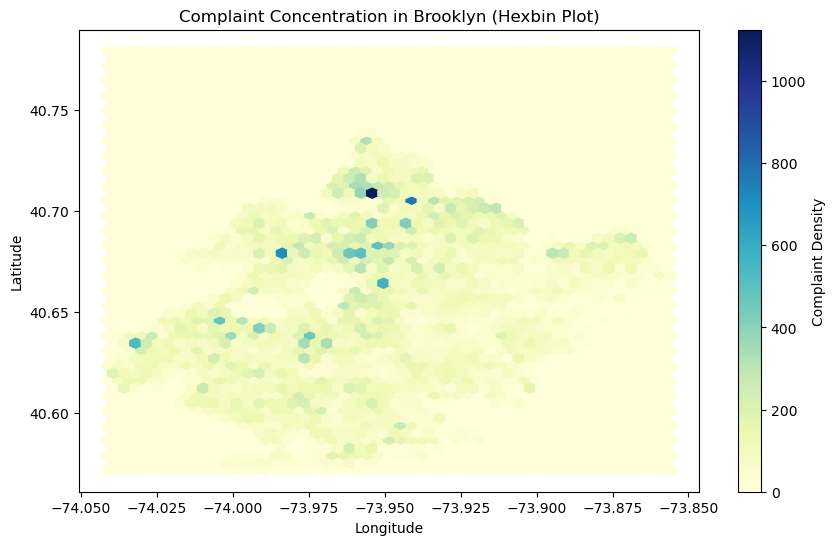

In [39]:
# Filter data for Brooklyn
brooklyn_data = df_cleaned[df_cleaned['City'] == 'BROOKLYN']

# Scatter plot for complaint concentration in Brooklyn
plt.figure(figsize=(10,6))
plt.scatter(brooklyn_data['Longitude'], brooklyn_data['Latitude'], alpha=0.3, color='blue')
plt.title("Complaint Concentration in Brooklyn (Scatter Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Hexbin plot for better visualization of density
plt.figure(figsize=(10,6))
plt.hexbin(brooklyn_data['Longitude'], brooklyn_data['Latitude'], gridsize=50, cmap='YlGnBu')
plt.colorbar(label='Complaint Density')
plt.title("Complaint Concentration in Brooklyn (Hexbin Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


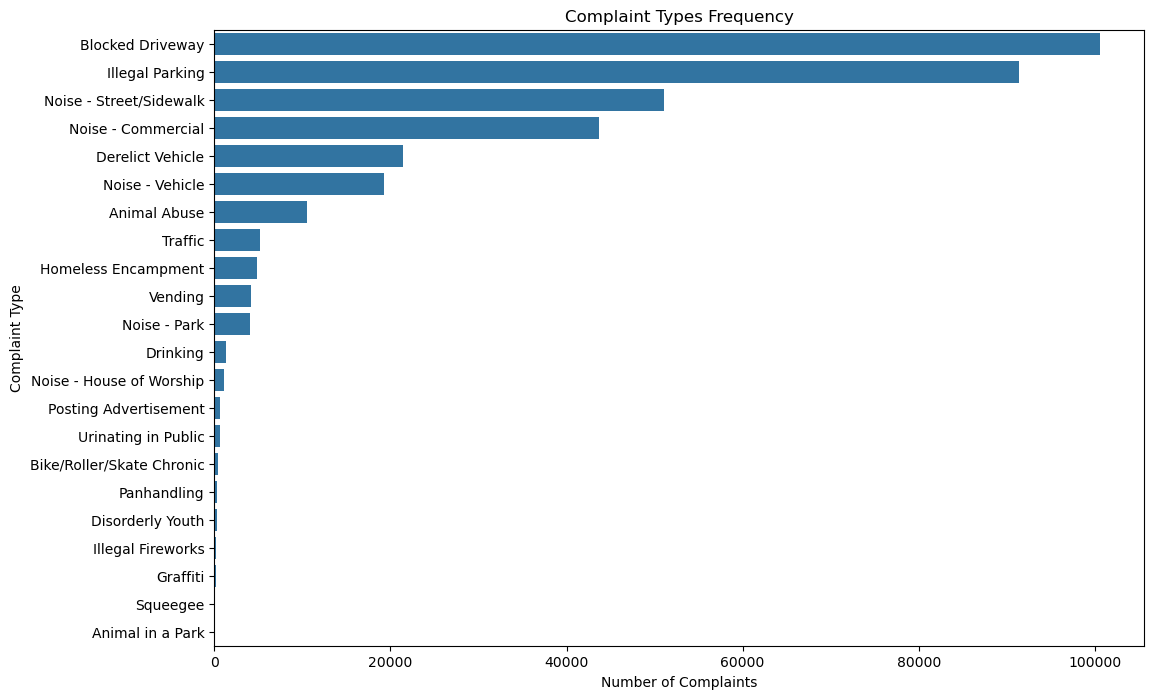

In [41]:
# Count complaints by type
complaint_types = df_cleaned['Complaint Type'].value_counts()

# Plot bar graph for complaint types
plt.figure(figsize=(12,8))
sns.barplot(x=complaint_types.values, y=complaint_types.index)
plt.title("Complaint Types Frequency")
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Type")
plt.show()


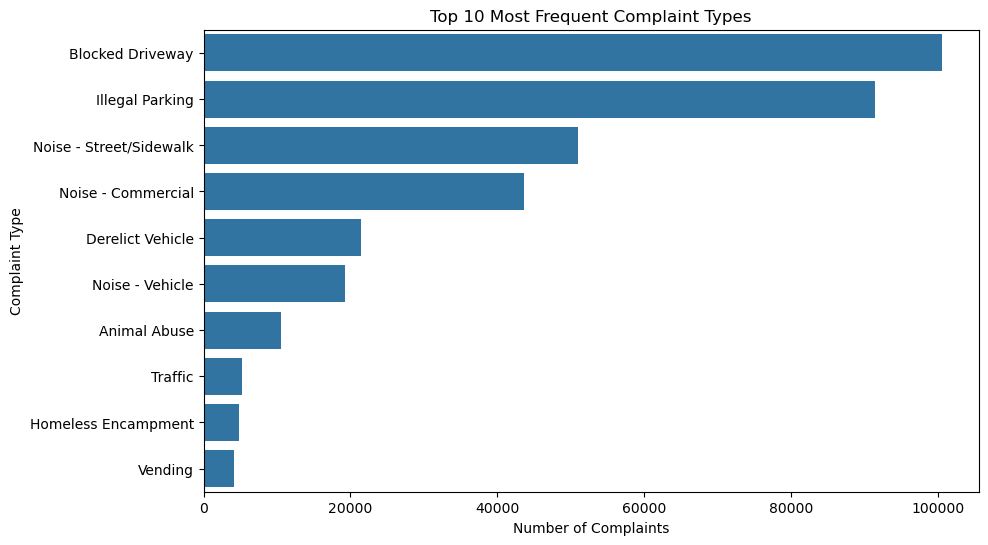

In [43]:
# Get the top 10 most frequent complaint types
top_complaints = complaint_types.head(10)

# Plot top 10 complaint types
plt.figure(figsize=(10,6))
sns.barplot(x=top_complaints.values, y=top_complaints.index)
plt.title("Top 10 Most Frequent Complaint Types")
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Type")
plt.show()


In [45]:
# Create a pivot table for complaint types per city
complaints_per_city = df_cleaned.pivot_table(index='City', columns='Complaint Type', aggfunc='size', fill_value=0)

# Display the new dataset
print(complaints_per_city)


Complaint Type       Animal Abuse  Animal in a Park  \
City                                                  
ARVERNE                        46                 0   
ASTORIA                       170                 0   
Astoria                         0                 0   
BAYSIDE                        53                 0   
BELLEROSE                      15                 0   
BREEZY POINT                    2                 0   
BRONX                        1971                 0   
BROOKLYN                     3191                 0   
CAMBRIA HEIGHTS                15                 0   
CENTRAL PARK                    0                 0   
COLLEGE POINT                  35                 0   
CORONA                        104                 0   
EAST ELMHURST                  85                 0   
ELMHURST                       59                 0   
East Elmhurst                   0                 0   
FAR ROCKAWAY                  111                 0   
FLORAL PAR

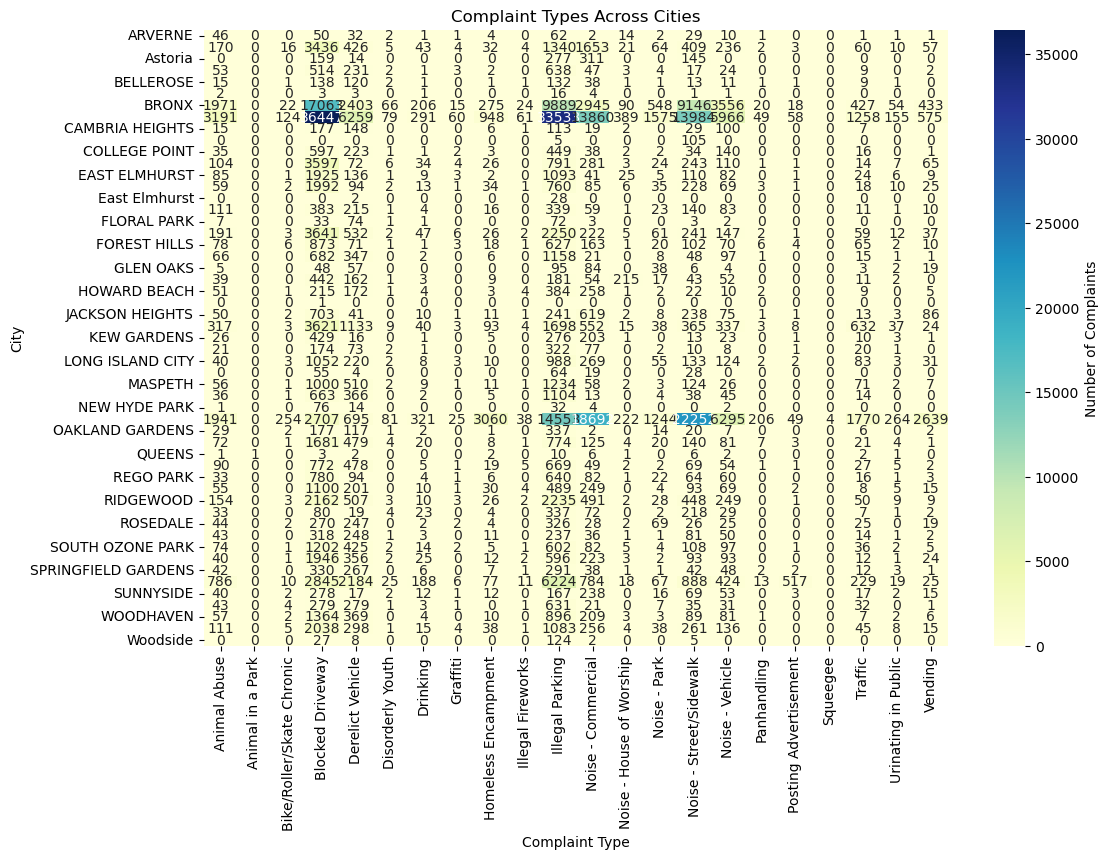

In [47]:
# Heatmap of complaint types across cities
plt.figure(figsize=(12,8))
sns.heatmap(complaints_per_city, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Complaints'})
plt.title("Complaint Types Across Cities")
plt.xlabel("Complaint Type")
plt.ylabel("City")
plt.show()


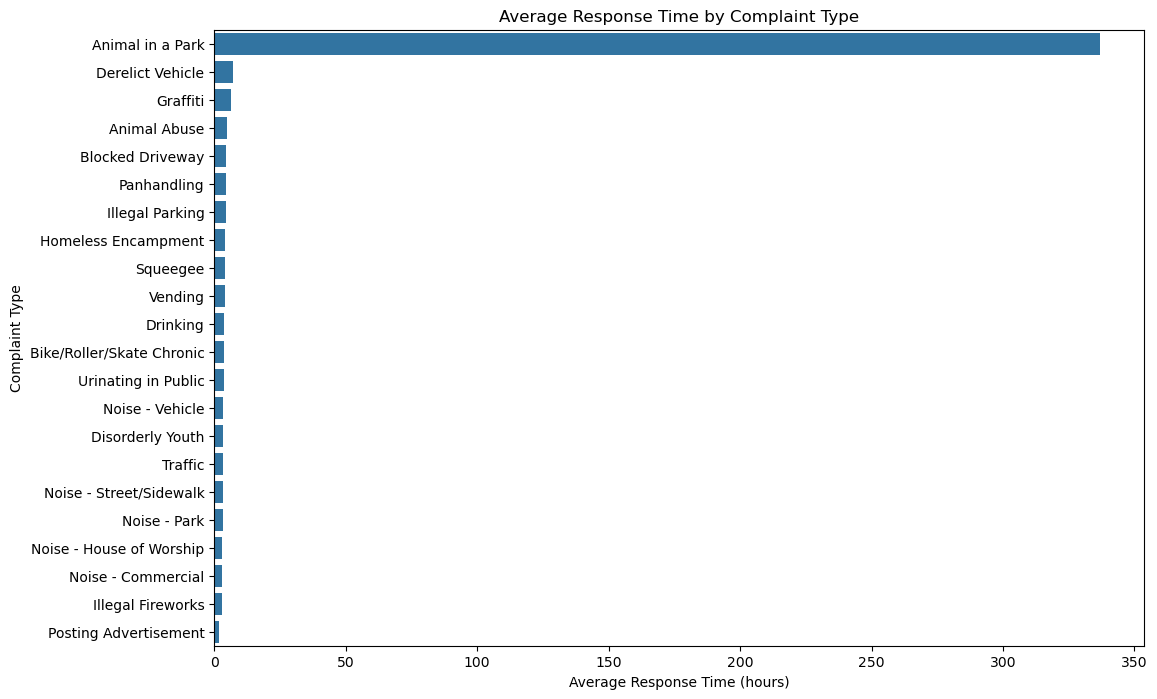

In [55]:
# Convert 'Created Date' and 'Closed Date' to datetime format (if not already in datetime)
df_cleaned['Created Date'] = pd.to_datetime(df_cleaned['Created Date'], errors='coerce')
df_cleaned['Closed Date'] = pd.to_datetime(df_cleaned['Closed Date'], errors='coerce')

# Calculate 'Response Time' as the difference between 'Closed Date' and 'Created Date'
# The result will be in the form of a Timedelta object, which we can convert to hours (or days)
df_cleaned['Response Time'] = (df_cleaned['Closed Date'] - df_cleaned['Created Date']).dt.total_seconds() / 3600  # hours

# Handle missing 'Response Time' values (if any rows have NaT in 'Closed Date')
df_cleaned = df_cleaned.dropna(subset=['Response Time'])

# Group by complaint type and calculate the average response time
avg_response_time = df_cleaned.groupby('Complaint Type')['Response Time'].mean().sort_values(ascending=False)

# Plot the average response time for each complaint type
plt.figure(figsize=(12,8))
sns.barplot(x=avg_response_time.values, y=avg_response_time.index)
plt.title("Average Response Time by Complaint Type")
plt.xlabel("Average Response Time (hours)")
plt.ylabel("Complaint Type")
plt.show()


In [57]:
from scipy.stats import chi2_contingency

# Create a contingency table between 'Complaint Type' and 'City'
contingency_table = pd.crosstab(df_cleaned['Complaint Type'], df_cleaned['City'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Statistic: 141343.23155024176
P-Value: 0.0
